In [ ]:
tested_qubits = {('0', '7'),
 ('10', '17'),
 ('11', '18'),
 ('12', '19'),
 ('14', '21'),
 ('2', '3'),
 ('20', '27'),
 ('22', '29'),
 ('23', '30'),
 ('24', '31'),
 ('25', '32'),
 ('26', '33'),
 ('28', '35'),
 ('34', '41'),
 ('36', '43'),
 ('37', '44'),
 ('38', '45'),
 ('39', '46'),
 ('40', '47'),
 ('5', '6'),
 ('50', '57'),
 ('51', '58'),
 ('52', '59'),
 ('53', '60'),
 ('54', '61'),
 ('56', '63'),
 ('62', '69'),
 ('64', '71'),
 ('65', '72'),
 ('68', '75'),
 ('70', '77'),
 ('73', '80'),
 ('74', '81'),
 ('78', '79'),
 ('8', '15'),
 ('82', '83'),
 ('9', '16')}

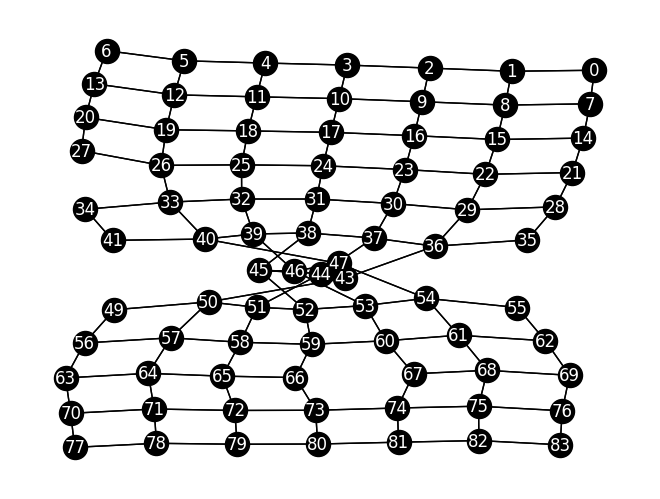

Efficiency: 0.9024390243902439


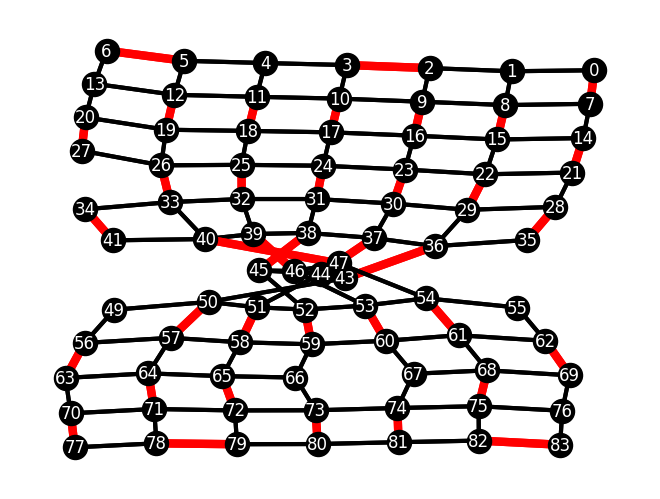

In [28]:
import networkx as nx
from braket.aws import AwsDevice
from braket.circuits import Circuit
from braket.devices import Devices
import matplotlib.pyplot as plt
from math import pi

Ankaa_device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Ankaa-3")
G = Ankaa_device.topology_graph
nx.draw_kamada_kawai(G, with_labels=True, node_color = 'black' ,font_color="white", arrows=False)
plt.show()

total_connectivity = Ankaa_device.properties.paradigm.connectivity.connectivityGraph
qubits = [qub for qub in total_connectivity]
qubits.sort(key=float)

red_edges = list(tested_qubits)
connected_qubits = [str(qub_pair[0]) for qub_pair in red_edges] + [str(qub_pair[1]) for qub_pair in red_edges]
connected_qubits.sort(key=float)
# print("Connected Qubits:\n",connected_qubits,"\n")
# print("Total Qubits:\n",qubits,"\n")
print("Efficiency:", len(connected_qubits)/len(qubits))

# 3. Create a color map based on G.edges()
edge_colors = []
widths = []
for u, v in G.edges():
    u = str(u)
    v = str(v)
    # Check if the edge (or its reverse) is in your red_subset
    if (u, v) in red_edges or (v, u) in red_edges:
        edge_colors.append('red')
        widths.append(6)
    else:
        edge_colors.append('black')
        widths.append(3)

black_edges = [e for e in G.edges() if e not in red_edges and (e[1], e[0]) not in red_edges]

nx.draw_kamada_kawai(G, with_labels=True, edge_color=edge_colors, node_color = 'black' ,font_color="white", width = widths, arrows=False)
plt.show()




In [9]:
cross_talked_qubits = set()

for q_0,q_1 in tested_qubits:
    if max(int(q_0),int(q_1)) < 50:
        cross_talked_qubits.add((q_0,q_1))


cross_talked_qubits
        

{('0', '7'),
 ('10', '17'),
 ('11', '18'),
 ('12', '19'),
 ('14', '21'),
 ('2', '3'),
 ('20', '27'),
 ('22', '29'),
 ('23', '30'),
 ('24', '31'),
 ('25', '32'),
 ('26', '33'),
 ('28', '35'),
 ('34', '41'),
 ('36', '43'),
 ('37', '44'),
 ('38', '45'),
 ('39', '46'),
 ('40', '47'),
 ('5', '6'),
 ('8', '15'),
 ('9', '16')}

Efficiency: 0.9024390243902439


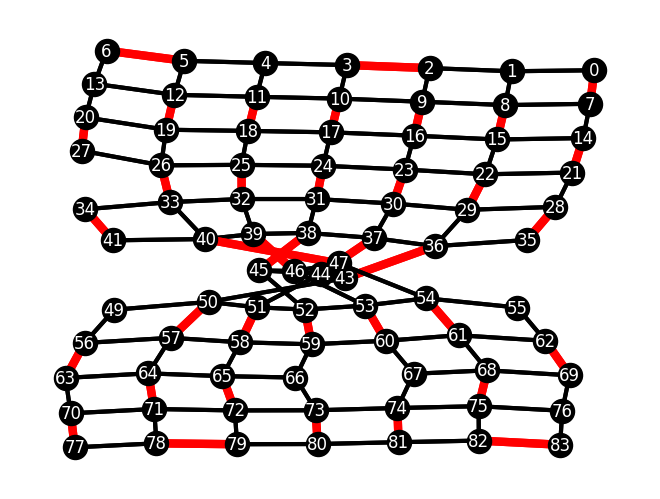

Efficiency: 0.5365853658536586


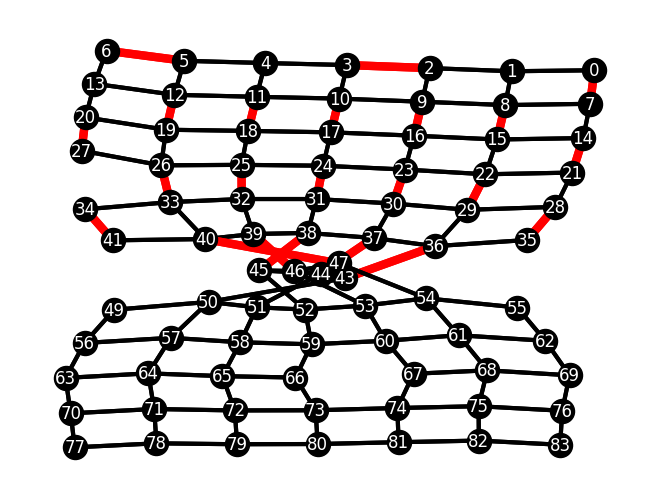

In [10]:
red_edges = list(tested_qubits)
connected_qubits = [str(qub_pair[0]) for qub_pair in red_edges] + [str(qub_pair[1]) for qub_pair in red_edges]
connected_qubits.sort(key=float)
# print("Connected Qubits:\n",connected_qubits,"\n")
# print("Total Qubits:\n",qubits,"\n")
print("Efficiency:", len(connected_qubits)/len(qubits))

# 3. Create a color map based on G.edges()
edge_colors = []
widths = []
for u, v in G.edges():
    u = str(u)
    v = str(v)
    # Check if the edge (or its reverse) is in your red_subset
    if (u, v) in red_edges or (v, u) in red_edges:
        edge_colors.append('red')
        widths.append(6)
    else:
        edge_colors.append('black')
        widths.append(3)

black_edges = [e for e in G.edges() if e not in red_edges and (e[1], e[0]) not in red_edges]

nx.draw_kamada_kawai(G, with_labels=True, edge_color=edge_colors, node_color = 'black' ,font_color="white", width = widths, arrows=False)
plt.show()




red_edges = list(cross_talked_qubits)
connected_qubits = [str(qub_pair[0]) for qub_pair in red_edges] + [str(qub_pair[1]) for qub_pair in red_edges]
connected_qubits.sort(key=float)
# print("Connected Qubits:\n",connected_qubits,"\n")
# print("Total Qubits:\n",qubits,"\n")
print("Efficiency:", len(connected_qubits)/len(qubits))

# 3. Create a color map based on G.edges()
edge_colors = []
widths = []
for u, v in G.edges():
    u = str(u)
    v = str(v)
    # Check if the edge (or its reverse) is in your red_subset
    if (u, v) in red_edges or (v, u) in red_edges:
        edge_colors.append('red')
        widths.append(6)
    else:
        edge_colors.append('black')
        widths.append(3)

black_edges = [e for e in G.edges() if e not in red_edges and (e[1], e[0]) not in red_edges]

nx.draw_kamada_kawai(G, with_labels=True, edge_color=edge_colors, node_color = 'black' ,font_color="white", width = widths, arrows=False)
plt.show()


In [11]:
from braket.tracking import Tracker

t = Tracker().start()

In [29]:
from braket.aws import AwsDevice
from braket.circuits import Circuit
from braket.devices import Devices

%matplotlib inline

In [134]:
# set up the Rigetti Ankaa-3 device
device = AwsDevice(Devices.IQM.Garnet)

# list the native gate set
print("The native gates for the", device.name, "device are:")
for gate in device.properties.paradigm.nativeGateSet:
    print(gate)

The native gates for the Garnet device are:
cz
prx
cc_prx
measure_ff


In [139]:
bell = Circuit().rx(0,pi)
print(bell)
# result = device.run(bell, shots=1000).result()
print(result.measurement_counts)

T  : │     0      │
      ┌──────────┐ 
q0 : ─┤ Rx(3.14) ├─
      └──────────┘ 
T  : │     0      │
Counter({'1': 973, '0': 27})


In [16]:
meta = result.additional_metadata.rigettiMetadata
print(meta.compiledProgram)

PRAGMA INITIAL_REWIRING "NAIVE"
DECLARE ro BIT[2]
PRAGMA PRESERVE_BLOCK
RZ(3.141592653589793) 9
RZ(1.5707963267948966) 16
RX(1.5707963267948966) 16
RZ(1.5707963267948966) 16
RZ(10.995574287564276) 16
RZ(3.141592653589793) 16
ISWAP 16 9
RZ(1.5707963267948966) 16
RX(1.5707963267948966) 16
RZ(4.71238898038469) 16
ISWAP 16 9
RZ(3.141592653589793) 9
RX(1.5707963267948966) 9
RZ(3.141592653589793) 9
RZ(1.5707963267948966) 9
RX(1.5707963267948966) 9
RZ(1.5707963267948966) 9
PRAGMA END_PRESERVE_BLOCK
MEASURE 16 ro[0]
MEASURE 9 ro[1]


In [17]:
print("Quantum Task Summary")
print(t.quantum_tasks_statistics())
print(
    "Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).",
)
print(
    f"Estimated cost to run this example: {t.qpu_tasks_cost() + t.simulator_tasks_cost():.3f} USD",
)

Quantum Task Summary
{<_Rigetti.Ankaa3: 'arn:aws:braket:us-west-1::device/qpu/rigetti/Ankaa-3'>: {'shots': 2000, 'tasks': {'COMPLETED': 2}}}
Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).
Estimated cost to run this example: 2.400 USD


In [26]:
Full_iSWAPS = Circuit()

for q_0,q_1 in tested_qubits:
    q_0_int = int(q_0)
    q_1_int = int(q_1)
    Full_iSWAPS = Full_iSWAPS.iswap(q_0_int,q_1_int)

# print(Full_iSWAPS)

In [44]:
num_gates = 20

Full_iSWAPS = Circuit()

for qubit in qubits:
    Full_iSWAPS.rz(int(qubit),pi/2)
    Full_iSWAPS.rx(int(qubit),pi/2)

for q_0,q_1 in tested_qubits:
    q_l_int = int(min(q_0,q_1))
    q_b_int = int(max(q_0,q_1))
    Full_iSWAPS = Full_iSWAPS.iswap(q_l_int,q_b_int)
    Full_iSWAPS.rx(q_l_int,pi/2)

for q_0,q_1 in tested_qubits:
    q_l_int = int(min(q_0,q_1))
    q_b_int = int(max(q_0,q_1))
    number_done = 0
    while number_done < num_gates: 
        Full_iSWAPS = Full_iSWAPS.iswap(q_l_int,q_b_int)
        number_done += 1


# print(Full_iSWAPS)

In [45]:
num_gates = 20

Half_iSWAPS = Circuit()

for qubit in qubits:
    Half_iSWAPS.rz(int(qubit),pi/2)
    Half_iSWAPS.rx(int(qubit),pi/2)

for q_0,q_1 in tested_qubits:
    q_l_int = int(min(q_0,q_1))
    q_b_int = int(max(q_0,q_1))
    Half_iSWAPS = Half_iSWAPS.iswap(q_l_int,q_b_int)
    Half_iSWAPS.rx(q_l_int,pi/2)

for q_0,q_1 in cross_talked_qubits:
    q_l_int = int(min(q_0,q_1))
    q_b_int = int(max(q_0,q_1))
    number_done = 0
    while number_done < num_gates: 
        Half_iSWAPS = Half_iSWAPS.iswap(q_l_int,q_b_int)
        number_done += 1


# print(Half_iSWAPS)

In [46]:
verbatim_Full_iSWAPS = Circuit().add_verbatim_box(Full_iSWAPS)
verbatim_Half_iSWAPS = Circuit().add_verbatim_box(Half_iSWAPS)


In [47]:
Ankaa_device.queue_depth().quantum_tasks

{<QueueType.NORMAL: 'Normal'>: '0', <QueueType.PRIORITY: 'Priority'>: '0'}

In [48]:
Full_task = Ankaa_device.run(verbatim_Full_iSWAPS, shots=4096, disable_qubit_rewiring=True)

In [49]:

Full_task_id = Full_task.id

Full_result = Full_task.result()
compiled_program = Full_result.additional_metadata.rigettiMetadata.compiledProgram


# rigetti_task_id = Half_task.id


In [154]:
Full_result.measured_qubits

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83]

In [81]:
import os
print(os.getcwd())

/home/ec2-user/amazon-braket-examples/examples/braket_features


In [ ]:
import json

result = Full_result.measurement_counts.keys()

with open('/home/ec2-user/SageMaker/result.json', 'w', encoding='utf-8') as f:
    json.dump(str(result), f, ensure_ascii=False, indent=4)



In [90]:
Half_task = Ankaa_device.run(verbatim_Half_iSWAPS, shots=4096, disable_qubit_rewiring=True)

Half_task_id = Half_task.id

Half_result = Half_task.result()


In [155]:
Half_result.measured_qubits

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83]

In [ ]:
import json

Half_result_counts = Half_result.measurement_counts.keys()

with open('/home/ec2-user/SageMaker/Half_result.json', 'w', encoding='utf-8') as f:
    json.dump(str(Half_result_counts), f, ensure_ascii=False, indent=4)



In [ ]:
print(tested_qubits)

with open('/home/ec2-user/SageMaker/tested_qubits.json', 'w', encoding='utf-8') as f:
    json.dump(str(tested_qubits), f, ensure_ascii=False, indent=4)

In [95]:
print(cross_talked_qubits)

with open('/home/ec2-user/SageMaker/cross_talked_qubits.json', 'w', encoding='utf-8') as f:
    json.dump(str(cross_talked_qubits), f, ensure_ascii=False, indent=4)

{('37', '44'), ('39', '46'), ('24', '31'), ('5', '6'), ('25', '32'), ('9', '16'), ('12', '19'), ('26', '33'), ('11', '18'), ('34', '41'), ('2', '3'), ('22', '29'), ('10', '17'), ('40', '47'), ('20', '27'), ('0', '7'), ('14', '21'), ('28', '35'), ('36', '43'), ('8', '15'), ('38', '45'), ('23', '30')}


TypeError: Object of type set is not JSON serializable

In [96]:
num_gates = 20

no_iSWAPS = Circuit()

for qubit in qubits:
    no_iSWAPS.rz(int(qubit),pi/2)
    no_iSWAPS.rx(int(qubit),pi/2)

for q_0,q_1 in tested_qubits:
    q_l_int = int(min(q_0,q_1))
    q_b_int = int(max(q_0,q_1))
    no_iSWAPS = no_iSWAPS.iswap(q_l_int,q_b_int)
    no_iSWAPS.rx(q_l_int,pi/2)

# for q_0,q_1 in cross_talked_qubits:
#     q_l_int = int(min(q_0,q_1))
#     q_b_int = int(max(q_0,q_1))
#     number_done = 0
#     while number_done < num_gates: 
#         no_iSWAPS = no_iSWAPS.iswap(q_l_int,q_b_int)
#         number_done += 1


# print(no_iSWAPS)

In [97]:
verbatim_no_iSWAPS = Circuit().add_verbatim_box(no_iSWAPS)
no_task = Ankaa_device.run(verbatim_no_iSWAPS, shots=4096, disable_qubit_rewiring=True)

In [101]:
no_results = no_task.result()

baseline_results = no_results.measurement_counts.keys()

with open('/home/ec2-user/SageMaker/baseline_results.json', 'w', encoding='utf-8') as f:
    json.dump(str(baseline_results), f, ensure_ascii=False, indent=4)

In [104]:
print(no_results.additional_metadata.rigettiMetadata.compiledProgram)

PRAGMA INITIAL_REWIRING "NAIVE"
DECLARE ro BIT[82]
PRAGMA PRESERVE_BLOCK
RZ(1.5707963267948966) 0
RX(1.5707963267948966) 0
RZ(1.5707963267948966) 1
RX(1.5707963267948966) 1
RZ(1.5707963267948966) 2
RX(1.5707963267948966) 2
RZ(1.5707963267948966) 3
RX(1.5707963267948966) 3
RZ(1.5707963267948966) 4
RX(1.5707963267948966) 4
RZ(1.5707963267948966) 5
RX(1.5707963267948966) 5
RZ(1.5707963267948966) 6
RX(1.5707963267948966) 6
RZ(1.5707963267948966) 7
RX(1.5707963267948966) 7
RZ(1.5707963267948966) 8
RX(1.5707963267948966) 8
RZ(1.5707963267948966) 9
RX(1.5707963267948966) 9
RZ(1.5707963267948966) 10
RX(1.5707963267948966) 10
RZ(1.5707963267948966) 11
RX(1.5707963267948966) 11
RZ(1.5707963267948966) 12
RX(1.5707963267948966) 12
RZ(1.5707963267948966) 13
RX(1.5707963267948966) 13
RZ(1.5707963267948966) 14
RX(1.5707963267948966) 14
RZ(1.5707963267948966) 15
RX(1.5707963267948966) 15
RZ(1.5707963267948966) 16
RX(1.5707963267948966) 16
RZ(1.5707963267948966) 17
RX(1.5707963267948966) 17
RZ(1.570796

In [106]:
num_gates = 20

Bell_Base_iSWAPS = Circuit()

for qubit in qubits:
    Bell_Base_iSWAPS.rx(int(qubit),pi/2)

for q_0,q_1 in tested_qubits:
    q_l_int = int(min(q_0,q_1))
    q_b_int = int(max(q_0,q_1))
    Bell_Base_iSWAPS = Bell_Base_iSWAPS.iswap(q_l_int,q_b_int)
    Bell_Base_iSWAPS.rz(q_l_int,pi/2)
    Bell_Base_iSWAPS.rx(q_l_int,pi/2)

# for q_0,q_1 in tested_qubits:
#     q_l_int = int(min(q_0,q_1))
#     q_b_int = int(max(q_0,q_1))
#     number_done = 0
#     while number_done < num_gates: 
#         Bell_Base_iSWAPS = Bell_Base_iSWAPS.iswap(q_l_int,q_b_int)
#         number_done += 1


# print(Bell_Base_iSWAPS)

In [107]:
verbatim_Bell_Base_iSWAPS = Circuit().add_verbatim_box(Bell_Base_iSWAPS)
Bell_Base_iSWAPS_tasks = Ankaa_device.run(verbatim_no_iSWAPS, shots=4096, disable_qubit_rewiring=True)
Bell_Base_iSWAPS_results = Bell_Base_iSWAPS_tasks.result()

Bell_Base_iSWAPS_output = no_results.measurement_counts.keys()

with open('/home/ec2-user/SageMaker/Bell_Base_iSWAPS_output.json', 'w', encoding='utf-8') as f:
    json.dump(str(Bell_Base_iSWAPS_output), f, ensure_ascii=False, indent=4)

In [120]:
import numpy as np
print(np.array(qubits, dtype = int))
print((np.arange(83)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]


In [121]:
simple_iSWAPS_task.id

NameError: name 'simple_iSWAPS_task' is not defined

In [122]:
Ankaa_device.queue_depth()

QueueDepthInfo(quantum_tasks={<QueueType.NORMAL: 'Normal'>: '0', <QueueType.PRIORITY: 'Priority'>: '0'}, jobs='0')

In [124]:
num_gates = 15

simple_iSWAPS = Circuit()

for q_0,q_1 in tested_qubits:
    q_l_int = int(min(q_0,q_1))
    q_b_int = int(max(q_0,q_1))
    number_done = 0
    while number_done < num_gates: 
        simple_iSWAPS = simple_iSWAPS.iswap(q_l_int,q_b_int)
        number_done += 1

# print(simple_iSWAPS)


In [125]:

verbatim_simple_iSWAPS = Circuit().add_verbatim_box(simple_iSWAPS)
simple_iSWAPS_task = Ankaa_device.run(verbatim_simple_iSWAPS, shots=4096, disable_qubit_rewiring=True)
simple_iSWAPS_results = simple_iSWAPS_task.result()

simple_iSWAPS_output = simple_iSWAPS_results.measurement_counts.keys()

with open('/home/ec2-user/SageMaker/simple_iSWAPS_output.json', 'w', encoding='utf-8') as f:
    json.dump(str(simple_iSWAPS_output), f, ensure_ascii=False, indent=4)

In [128]:
with open('/home/ec2-user/SageMaker/simple_iSWAPS_output.json', 'w', encoding='utf-8') as f:
    json.dump(str(simple_iSWAPS_output), f, ensure_ascii=False, indent=4)

In [150]:
tested_qubits

{('0', '7'),
 ('10', '17'),
 ('11', '18'),
 ('12', '19'),
 ('14', '21'),
 ('2', '3'),
 ('20', '27'),
 ('22', '29'),
 ('23', '30'),
 ('24', '31'),
 ('25', '32'),
 ('26', '33'),
 ('28', '35'),
 ('34', '41'),
 ('36', '43'),
 ('37', '44'),
 ('38', '45'),
 ('39', '46'),
 ('40', '47'),
 ('5', '6'),
 ('50', '57'),
 ('51', '58'),
 ('52', '59'),
 ('53', '60'),
 ('54', '61'),
 ('56', '63'),
 ('62', '69'),
 ('64', '71'),
 ('65', '72'),
 ('68', '75'),
 ('70', '77'),
 ('73', '80'),
 ('74', '81'),
 ('78', '79'),
 ('8', '15'),
 ('82', '83'),
 ('9', '16')}

In [152]:
total_connectivity = Ankaa_device.properties.paradigm.connectivity.connectivityGraph
qubits = [qub for qub in total_connectivity]

In [153]:
qubits

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '43',
 '44',
 '45',
 '46',
 '47',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83']